# **SENTIMENTAL ANALYSIS USING ROBERTA MODEL**

**RoBERTa (A Robustly Optimized BERT Pretraining Approach)** is a state-of-the-art natural language processing (NLP) model developed by Facebook AI in 2019. It is an extension and improvement of the BERT (Bidirectional Encoder Representations from Transformers) model. Here are key points about RoBERTa and its use in sentiment analysis:

RoBERTa Model:
   - RoBERTa is a transformer-based neural network model, similar in architecture to BERT. It is designed for various NLP tasks, including text classification, language understanding, and generation.
   - The key innovation in RoBERTa is its optimization techniques and a larger pretraining corpus, which result in better performance compared to BERT.

**Algorithm Used by RoBERTa:**
   - RoBERTa employs a variant of the transformer architecture. Transformers use self-attention mechanisms to process input data and capture contextual relationships between words or tokens in a text.
   - It uses a masked language modeling (MLM) objective during pretraining, where it predicts missing words in a sentence to learn rich contextual embeddings.

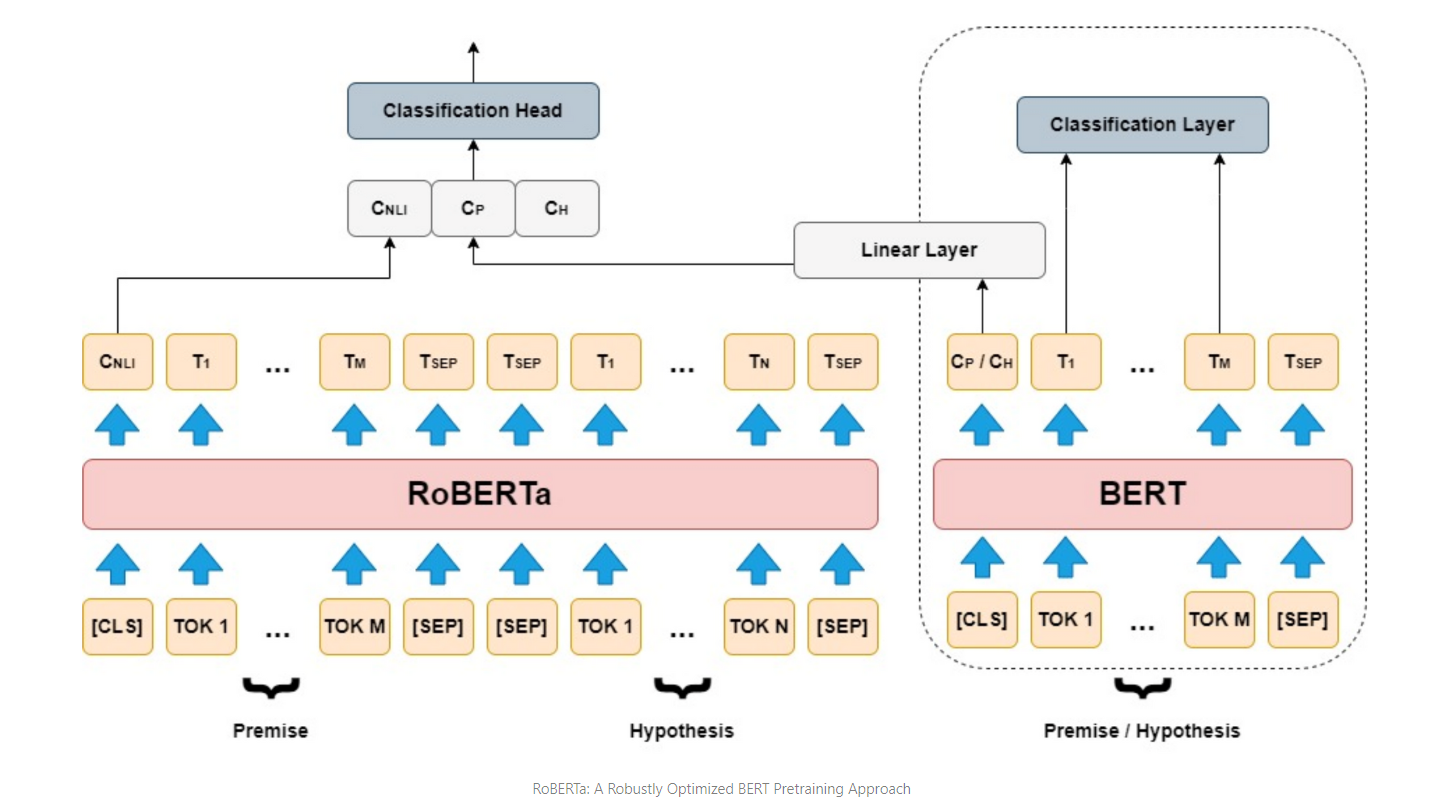

**RoBERTa vs. Other ML Algorithms:**
   RoBERTa is used for sentiment analysis over other ML algorithms because:

1. **Contextual Understanding**: RoBERTa's deep learning architecture excels at understanding the context of words in a sentence, which is crucial for sentiment analysis.

2. **Fine-Tuning**: RoBERTa can be fine-tuned for sentiment analysis tasks, adapting its pre-trained knowledge to specific sentiment classification requirements.

3. **Multilingual Support**: It can handle sentiment analysis in multiple languages due to its pre-training on diverse text.

4. **High Performance**: RoBERTa consistently achieves state-of-the-art results in NLP, making it a top choice for sentiment analysis due to its advanced capabilities.

5. **Transfer Learning**: Its transfer learning abilities enable efficient adaptation to sentiment analysis tasks with relatively small amounts of labeled data.

## Sentimental Analysis Code

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd


# Define the pre-trained model and labels
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
labels = ['Negative', 'Neutral', 'Positive']


# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)


# Function to perform sentiment analysis on a single tweet
def analyze_sentiment(tweet):
    tweet_words = []


    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)


    tweet_proc = " ".join(tweet_words)


    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
    output = model(**encoded_tweet)


    scores = output[0][0].detach().numpy()
    scores = softmax(scores)


    sentiment_probabilities = {labels[i]: scores[i] for i in range(len(labels))}
    return sentiment_probabilities


# Load the CSV dataset
file_path = 'tweets.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)


# Extract text data from the 'tweets' column
texts = df['tweets']


# Perform sentiment analysis on each text
results = []
for text in texts:
    sentiment_probs = analyze_sentiment(text)
    results.append({
        "text": text,
        "sentiment_probabilities": sentiment_probs
    })


# Print or store the results
for result in results:
    print("\n\nText:", result["text"])

    max_sentiment = max(sentiment_probs, key=sentiment_probs.get)

    print("Sentiment Analysis:")
    for label, probability in sentiment_probs.items():
        print(f"{label}: {probability:.4f}")

    print("Max Sentiment:", max_sentiment)




Text: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Sentiment Analysis:
Negative: 0.0244
Neutral: 0.9156
Positive: 0.0600
Max Sentiment: Neutral


Text: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Sentiment Analysis:
Negative: 0.0244
Neutral: 0.9156
Positive: 0.0600
Max Sentiment: Neutral


Text: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Sentiment Analysis:
Negative: 0.0244
Neutral: 0.9156
Positive: 0.0600
Max Sentiment: Neutral


Text: my whole body feels itchy and like its on fire 
Sentiment Analysis:
Negative: 0.0244
Neutral: 0.9156
Positive: 0.0600
Max Sentiment: Neutral


Text: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
Sentiment Analysis:
Negative: 0.0244
Neutral: 0.9156
Positive: 0.0600
Max Sentiment: Neutral


Text: @Kwesidei